In [1]:
from sklearn import manifold, mixture, metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from collections import OrderedDict
import random

In [2]:
n_class = 5
label_colors = [list( mcolors.TABLEAU_COLORS )[i] 
                  for i in range( 10 )]

In [3]:
datasetOriginal = pd.read_csv("..\\data\\mnist_test.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [5]:
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [6]:
unique, counts = np.unique(label, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [7]:
# selecionando apenas parte dos dados
# de 0 a 5
idx = sum([num_data[i] for i in range(n_class)]) # soma a qtd de elementos de cada label
label_cut = label[:idx]
x_cut = x[:idx, :]

In [8]:
colors = [label_colors[v] for v in label_cut]

In [9]:
c = list(zip(x_cut, label_cut))
random.shuffle(c)
x_cut, label_cut = zip(*c)

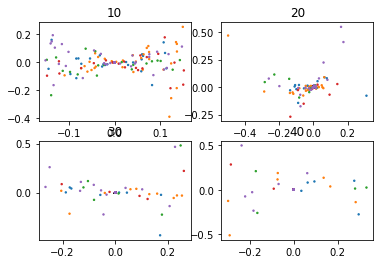

In [10]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)

ltsa = manifold.LocallyLinearEmbedding(n_neighbors=8, n_components=2, method='ltsa')
transformed = ltsa.fit_transform(x_cut)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=2)
ax.set_title('10')

ltsa = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='ltsa')
transformed = ltsa.fit_transform(x_cut)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=2)
ax.set_title('20')

ltsa = manifold.LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='ltsa')
transformed = ltsa.fit_transform(x_cut)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=2)
ax.set_title('30')

ltsa = manifold.LocallyLinearEmbedding(n_neighbors=20, n_components=2, method='ltsa')
transformed = ltsa.fit_transform(x_cut)
ax = fig.add_subplot(gs[1, 1])
ax.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=2)
ax.set_title('40')

plt.show()

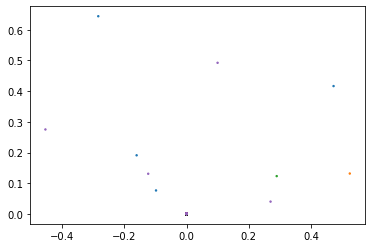

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='ltsa', neighbors_algorithm='ball_tree')
transformed = ltsa.fit_transform(x_cut)

ax.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=2)
plt.show()